## Objectius

Els objectius d'aquesta pràctica són:
* Aplicar models de regressió, ficant l'èmfasi en:
 * Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
 * Avaluar correctament l'error del model 
 * Visualitzar les dades i el model resultant
 * Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones

Una regressió lineal i/o polinòmica és un procediment matemàtic per intentar trobar la recta o funció que millor s'aproxima a la distribució de punts de 2 a n variables. UAquest link explica força bé la idea que hi ha darrera. 

https://www.codificandobits.com/blog/regresion-lineal/

In [1]:
%matplotlib inline

#imports
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


### Per tenir un primer exemple lo que farem és implementar un regresso linal molt senzill d'un dataset 

##### Alguns links a funcions que podrieu tenir en compte podrien ser: 


* [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

* [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



        hours       mark
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]


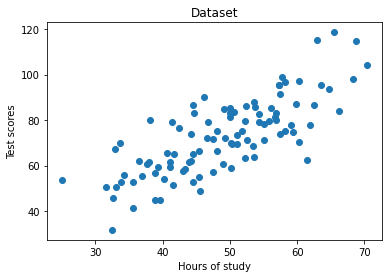

In [2]:
#Comencen amb un exmemple senzill carregant el dataset
points = pd.read_csv('data.csv', delimiter=',', names = ["hours", "mark"])
print(points)
#Extract columns
x = array(points.values[:,0])
y = array(points.values[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

In [3]:
reg = LinearRegression().fit(x.reshape(-1,1),y.reshape(-1,1))

In [4]:
reg.coef_

array([[1.32243102]])

In [5]:
reg.intercept_

array([7.99102098])

## Com podeu veure fer anar una regressió Lineal és una cosa relativament senzilla. En tot cas ara hi ha alguns conceptes interessants que haurieu de desxifrar

### TODO Un cop realitzat aquesta petita prova em podrieu dibuixar la recta que passa per aquests punts i que acabem d'aprendre un cop entrenat el model?? Recordeu que una recta té forma de r= ax +b

In [6]:
print(x.reshape(-1,1).shape)

(100, 1)


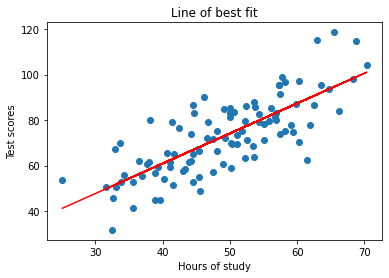

In [7]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = (reg.coef_ *  x.reshape(-1,1)) + reg.intercept_
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

## Ara que ja hem fet un exemple senzill anem a veure un cas una mica més interessant amb aquest dataset [https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv ]

In [8]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

df = pd.read_csv(path)

In [9]:
print(df.shape)

(201, 29)


In [10]:
## Primerament anem a crear el model un altre cop:

lm = LinearRegression()
lm

LinearRegression()

In [11]:
## Definim quin sera la predicció i quin serà el target. En aquest cas hem de buscar analíticament dades dependents X i Y

X = df[["highway-mpg"]]
y = df[["price"]]

In [12]:
## Entrenem el model 
lm.fit(X,y)

LinearRegression()

(0.0, 48166.66739304162)

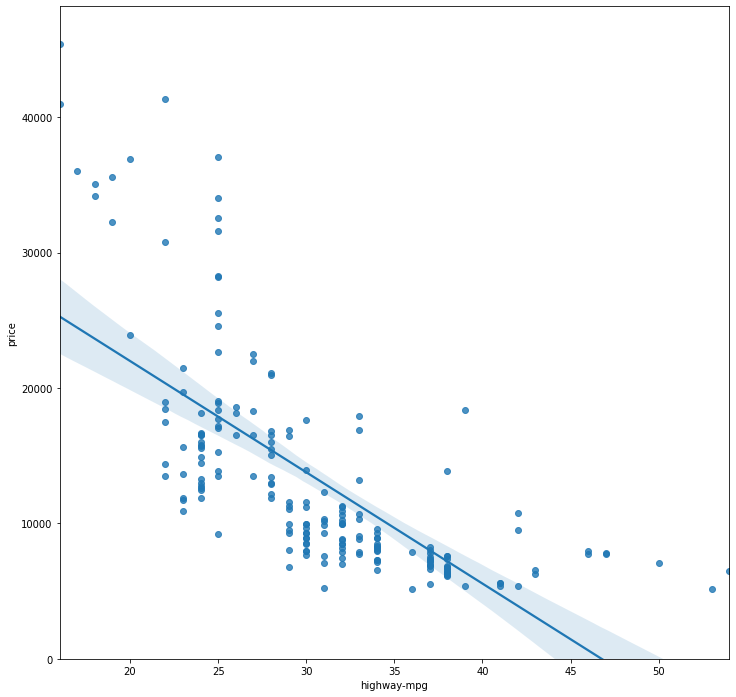

In [13]:
width = 12
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

### D'aquí podem treure informació com per exemple que el preu està correlaciona negativament amb la variable X

In [14]:
### Com ja sabem podem buscar la nostra propia linea amb el intercept i el coef que són els paràmetres i el desfase de la recta.
lm.intercept_ ## as b

array([38423.30585816])

In [15]:
lm.coef_ # as A from Ax + b

array([[-821.73337832]])

**Això vol dir que price = 38423.31 - 821.73 x highway-mpg**

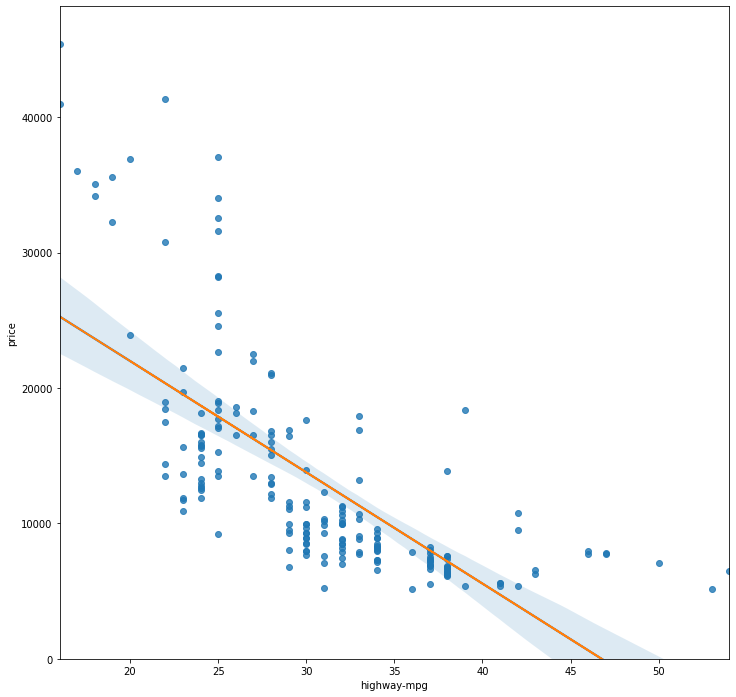

In [16]:
width = 12
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.plot(X, lm.coef_*X + lm.intercept_)

In [17]:
### Ara podem fer alguna predicció sobre les dades per veure quin és el error 
Yhat = lm.predict(X)
Yhat[:5] - y[:5]

,price
0,2741.504643
1,-263.495357
2,558.238022
3,-178.695492
4,2895.171535


    Les regressions lineals ajuden a explicar les dades. Per validar com de bé ho està fent aquest model primer de tot lo que hem de mirar són els errors residuals.  Aquesta és la diferència que hi ha entre les prediccions i el GT. La manera de determiar preicissament el "accuracy" d'aquests tipus de models és arrel de: R^2 i el MSE

    El R2 també conegut com a coeficient de determinació mesura com de prop estan les dades a la recta de regressió i el MSE és la mitjana de la diferència del GT i les dades predites [Yhat -y]

In [18]:
# The coefficients
print("Coefficients: \n", re.coef_)
# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y,Yhat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(y, Yhat))

NameError: name 'regr' is not defined

In [19]:
## això ens diu que prop del 49.6% de la variació del preu es pot explicar gracies a la variable highway_mpg. A més a més podem dir que menys del 50% de les dades estan prop de la linia. En aquest cas podem dir que una recta de regressió és una mala idea.

## Polynomial Regression

### En aquest com que un regressor lineal hem vist que noés una bona idea lo que podem fer és entrenar un regressor polinomial. Per fer això ho farem sobre les mateixes dades.

In [44]:
X.values.reshape(1,-1)

array([[27, 27, 26, 30, 22, 25, 25, 25, 20, 29, 29, 28, 28, 25, 22, 22,
        20, 53, 43, 43, 41, 38, 30, 38, 38, 38, 30, 30, 24, 54, 38, 42,
        34, 34, 34, 34, 33, 33, 33, 33, 28, 31, 29, 29, 19, 19, 17, 31,
        38, 38, 38, 38, 23, 23, 23, 23, 32, 32, 32, 32, 42, 32, 27, 39,
        25, 25, 25, 25, 18, 18, 16, 16, 24, 41, 38, 38, 30, 30, 32, 24,
        24, 24, 32, 32, 30, 30, 37, 50, 37, 37, 37, 37, 37, 37, 37, 37,
        34, 34, 22, 22, 25, 25, 23, 25, 24, 33, 24, 25, 24, 33, 24, 25,
        24, 33, 24, 41, 30, 38, 38, 38, 30, 24, 27, 25, 25, 25, 31, 31,
        28, 28, 28, 28, 26, 26, 36, 31, 31, 37, 33, 32, 25, 29, 32, 31,
        29, 23, 39, 38, 38, 37, 32, 32, 37, 37, 36, 47, 47, 34, 34, 34,
        34, 29, 29, 30, 30, 30, 30, 30, 30, 34, 33, 32, 32, 32, 24, 24,
        24, 24, 46, 34, 46, 34, 34, 42, 32, 29, 29, 24, 38, 31, 28, 28,
        28, 28, 22, 22, 28, 25, 23, 27, 25]])

In [55]:
## Agafarem un polinomi d'ordre 3.
x= df["highway-mpg"]
y = df["price"]
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [56]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

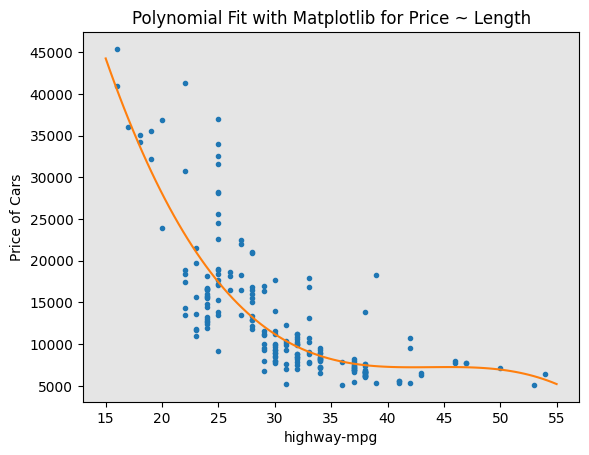

In [57]:
PlotPolly(p,x,y,"highway-mpg")

### En aquest cas podeu veure com la linia és moltissim millor fitejada que amb la linear Regression.

Pensau que podu fer el plot cada vegada amb més degree però computacionalment cada vegada costarà més. Més endavant també veureu quins són els principals problemes que pot donar fitejar coses d'una manera molt específica (overfitting)

# Propostes d'exercicis

# TODO 1

### Preguntes a respondre (agafa un altre model i entrena un regrewssor lineal per respondre aquestes preguntes
0. Separa el cjt d'aprenentatge i el de test. Els errors sempre seran sobre el de test.
1. Aprén un Regressor Lineal amb totes les característiques. Quins son els atributs més rellevants per a la regressió?
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls. Estan relacionats amb la resposta anterior?
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit? **Les caracterIstistiques que segueixen una distribució gaussiana solen tenir un error quadratic menor.**
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)
8. Compara el resultat del punt 1 amb el descens del gradient, en error i temps d'entrenament.

La sortid de un regressor polinomial és p(x_i) = y_i
el rang de la sortida de una regressió polinomial les limita les dades d'entrrada (F)
same + sortida (T)

# TODO 2

Ara lo que heu de fer és en comptes d'utilitzar una variable utilitzeu més per descriure el preu del automobil. Un cop fet això també doneume el coeficient d'explicació de les variables respecte al preu i compara el MSE amb el model anterior.
A més a més fes un plot d'un plinomi de grau 100 per exemple i treu conclusions. Sabries Explicar que vol dir overfitting i per que és un problema que pot afectar en casos com un polinomi de grau 11 per exemple o semblants?

 **per fer això investigueu el Polynomial Feature que dona sklearn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html**

# TODO 3
El Sklearn dona totes les implementacions per a realitzar aquestos models i entrenmaents. No obstant això per entendre el funcionament que hi ha sota aquestes crides per aquest cop haureu d'implementar vosaltres mateixos un Descens del gradient. És cert que hi ha algorismes alternatius com el mètode de newton per series de taylor, el Sthocastic Gradient (Has de forçar evitar cicles i crear batches) etc.

En aquest exercici, es tracta d'implementar en python el procés de descens del gradient explicat a les classes de teoria.

$$J(\theta) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; \theta) - y^{i})^2 + \lambda\sum_{j=1}^{n}(\theta_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot 1$$
$$\theta_j = \theta_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}\theta_{j} \right]$$


ó:

$$\theta_{j} := \theta_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $\theta_0$ i $\theta_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="https://miro.medium.com/max/810/1*UUHvSixG7rX2EfNFTtqBDA.gif">

Per a la implementació us podeu basar en el següent esquelet:

In [59]:
class Regressor(object):
    def __init__(self, alpha=1e-2):
        # Inicialitzem w
        self.w = None
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def __initialize_w(self, n_vars):
        self.d = None
        pass

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        # h = fer prediccio(x)
        
        # calcular gradient w0
        # calcular gradient w1
        
        # actualitzar w0 amb alpha
        # actualitzar w1 amd alpha
        
        # retornar el error
        return 0
    
    def fit(self, x, y, max_iter=1000, epsilon=1e-3): # Preguntar què és epsilon
                                                      # x és un vector o és una **matriu**
                                                      # el nombre de files de y és el mateix que el nombre de files de x
                                                        # len(x) ~!= len(y)
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? 
2. Quins valors de learning rate convergeixen més ràpid a la solució òptima? 
3. Com influeix la inicialització del model en el resultat final? 
4. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?
5. Evalueu mètriques de execució

